<a href="https://colab.research.google.com/github/Saripalli-Karthik/Neural-Network-ICP3/blob/main/Icp3_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2912 - accuracy: 0.9104 - val_loss: 0.1610 - val_accuracy: 0.9487
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.0965 - val_accuracy: 0.9691
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0744 - val_accuracy: 0.9764
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0434 - accuracy: 0.9858 - val_loss: 0.0828 - val_accuracy: 0.9748
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.1383 - val_accuracy: 0.9596
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0980 - val_accuracy: 0.9729
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0663 - val_acc

Plot the loss and accuracy for both training data and validation data using the history object in the source
code.


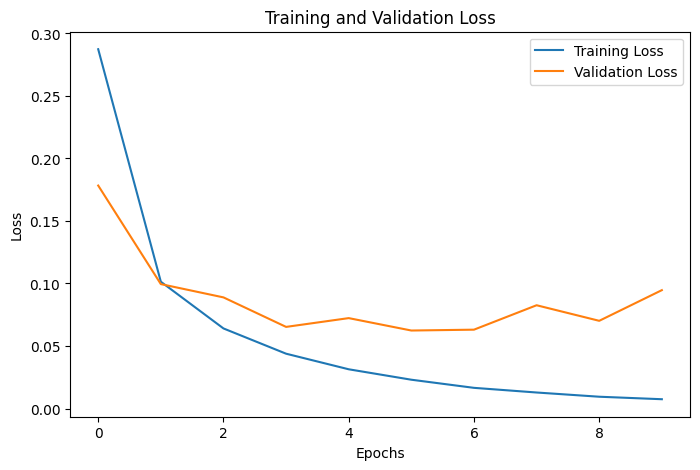

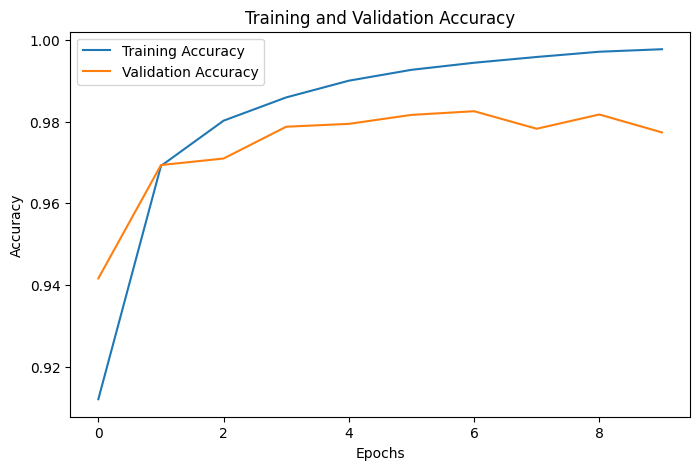

In [ ]:
# Plot training history: Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training history: Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.

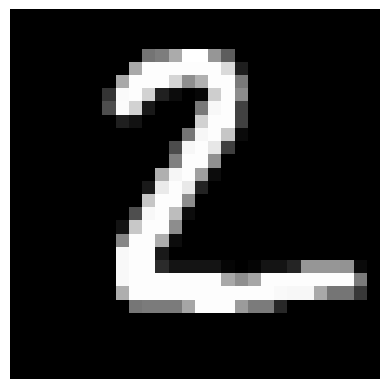

1/1 [==============================] - 0s 21ms/step
Predicted label: 2


In [ ]:
# Plot a single image from test data
plt.imshow(test_images[1], cmap='gray')
plt.axis('off')
plt.show()

# Perform inference on the single image
image = test_images[1].reshape(1,-1).astype('float')/255.0  # Reshape the image to match the input shape of the model
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f'Predicted label: {predicted_label}')

We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to sigmoid and see what happens

Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 1.7483 - accuracy: 0.3694 - val_loss: 0.9075 - val_accuracy: 0.7019
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6515 - accuracy: 0.7947 - val_loss: 0.5964 - val_accuracy: 0.8046
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.4094 - accuracy: 0.8775 - val_loss: 0.4099 - val_accuracy: 0.8748
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.3239 - accuracy: 0.9022 - val_loss: 0.3040 - val_accuracy: 0.9089
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2660 - accuracy: 0.9210 - val_loss: 0.2760 - val_accuracy: 0.9165
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.2212 - accuracy: 0.9328 - val_loss: 0.2577 - val_accuracy: 0.9236
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1857 - accuracy: 0.9441 - val_loss: 0.1780 - val_accuracy: 0.9468

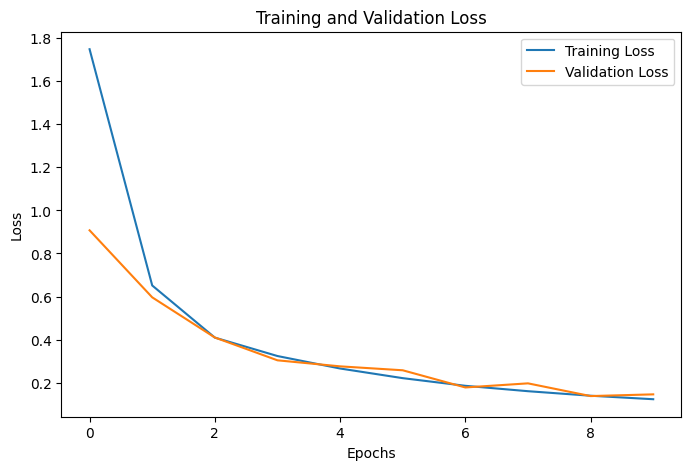

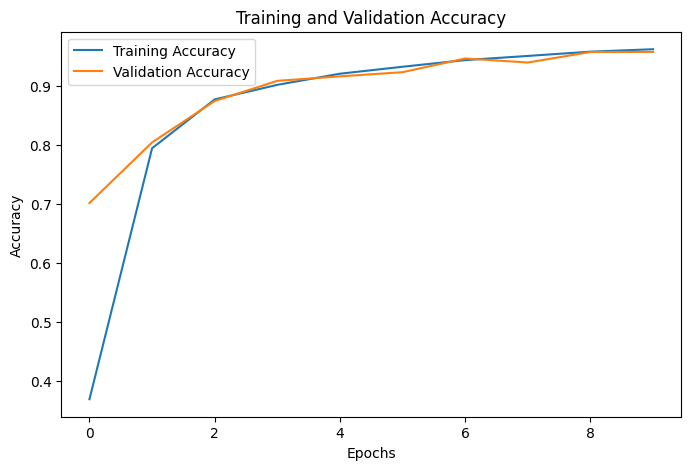

In [ ]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(256, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

model_sigmoid.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
plt.figure(figsize=(8, 5))
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training history: Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

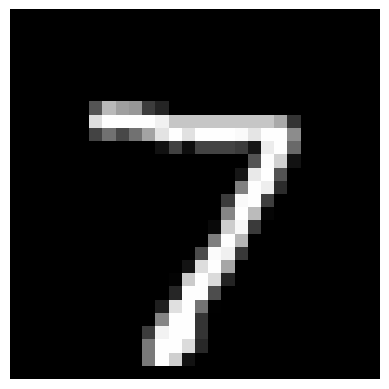

1/1 [==============================] - 0s 35ms/step
Predicted label: 7


In [ ]:
# Plot a single image from test data
plt.imshow(test_images[0], cmap='gray')
plt.axis('off')
plt.show()

# Perform inference on the single image
image = test_images[0].reshape(1,-1).astype('float')/255.0  # Reshape the image to match the input shape of the model
prediction = model_sigmoid.predict(image)
predicted_label = np.argmax(prediction)

print(f'Predicted label: {predicted_label}')

Run the same code without scaling the images and check the performance?

In [34]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model_no_scale = Sequential()
model_no_scale.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_no_scale.add(Dense(512, activation='relu'))
model_no_scale.add(Dense(10, activation='softmax'))
model_no_scale.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_no_scale = model_no_scale.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                      validation_data=(test_data, test_labels_one_hot))

# Evaluate model without scaling on test data
print("Evaluation on test data without scaling:")
print(model_no_scale.evaluate(test_data,test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 4.4343 - accuracy: 0.8891 - val_loss: 0.5340 - val_accuracy: 0.9372
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2954 - accuracy: 0.9574 - val_loss: 0.4111 - val_accuracy: 0.9491
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1559 - accuracy: 0.9727 - val_loss: 0.3670 - val_accuracy: 0.9513
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0995 - accuracy: 0.9797 - val_loss: 0.3077 - val_accuracy: 0.9602
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0765 - accuracy: 0.9840 - val_loss: 0.3378 - val_accuracy: 0.9596
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0963 - accuracy: 0.9819 - val_loss: 0.3158 - val_accuracy: 0.9609
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0727 - accuracy: 0.9858 - val_loss: 0.3408 - val_acc